In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, accuracy_score

from sklearn.ensemble import GradientBoostingClassifier

# Load dataset
file_path = "C:/Users/91749/Downloads/Goa University Dissertation (1).xlsx"
xls = pd.ExcelFile(file_path)
df = xls.parse("Onsite Form Responses ")

In [25]:
# Convert Date of Collection to datetime if available

    
# Extract useful components
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Weekday'] = df['Timestamp'].dt.weekday  # 0 = Monday, 6 = Sunday
df['Weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)
df['Is Feast Day'] = df['Timestamp'].isin(['2024-12-03']).astype(int)  # Add your feast dates


# Clean column names
df.columns = df.columns.str.strip()
print(df.columns)
df['State/Country'] = df['State/Country'].apply(lambda x: str(x).strip().lower())
df['Gender:'] = df['Gender:'].apply(lambda x: str(x).strip().lower())
df['Are you camping at the Basilica?'] = df['Are you camping at the Basilica?'].apply(lambda x: str(x).strip().lower())
df['Age groups'] = df['Age groups'].apply(lambda x: str(x).strip().lower())
df['Type of visitors'] = df['Type of visitors'].apply(lambda x: str(x).strip().lower())
df['walking pilgrim'] = df['walking pilgrim'].apply(lambda x: str(x).strip().lower())






Index(['Timestamp', 'Your Age', 'Gender:',
       'State of Residence in India/ Country', 'Event Attending',
       'How many years (approx) have you been visiting the Basilica?',
       'Are you camping at the Basilica?',
       'I agree to have my information used only for research purposes.',
       'walking pilgrim', 'State/Country', 'Region', 'Age groups',
       'No of times visited', 'Type of visitors', 'Country', 'Column 1', 'Day',
       'Month', 'Weekday', 'Weekend', 'Is Feast Day'],
      dtype='object')


In [26]:

df['Event Attending'] = df['Event Attending'].apply(lambda x: [i.strip() for i in x.split(',')] if pd.notna(x) else [])
print(df['Event Attending'].head(5)) 


# Create new columns for each event
df['Veneration of Relics'] = df['Event Attending'].apply(lambda x: 1 if 'Veneration of Relics' in x else 0)
df['Mass'] = df['Event Attending'].apply(lambda x: 1 if 'Mass' in x else 0)
df['Fair/Cultural Event/Sightseeing'] = df['Event Attending'].apply(lambda x: 1 if 'Fair / Cultural Event / Sightseeing' in x else 0)
df['Walking pilgrimage'] = df['Event Attending'].apply(lambda x: 1 if 'Walking pilgrimage' in x else 0)



0                         [Veneration of Relics, Mass]
1                [Fair / Cultural Event / Sightseeing]
2    [Veneration of Relics, Mass, Fair / Cultural E...
3    [Veneration of Relics, Mass, Fair / Cultural E...
4    [Veneration of Relics, Mass, Fair / Cultural E...
Name: Event Attending, dtype: object


In [27]:
# Standardizing Gender values
df["Gender:"] = df["Gender:"].replace({"male": "Male"})
print(df['Gender:'].head(5)) 

0    female
1    female
2    female
3      Male
4      Male
Name: Gender:, dtype: object


In [28]:

# Encode categorical variables
le_gender = LabelEncoder()
le_state = LabelEncoder()
le_stay = LabelEncoder()
le_age = LabelEncoder()
le_visitcount=LabelEncoder()
df['Gender:'] = le_gender.fit_transform(df['Gender:'])
df['State/Country'] = le_state.fit_transform(df['State/Country'])
#df["Region"] = le_state.fit_transform(df["Region"])

df["Are you camping at the Basilica?"] = le_stay.fit_transform(df["Are you camping at the Basilica?"])
df["Age groups"] = le_age.fit_transform(df["Age groups"])
df["Type of visitors"] = le_visitcount.fit_transform(df["Type of visitors"])
le_wp = LabelEncoder()
le_event = LabelEncoder()
df['walking pilgrim'] = le_wp.fit_transform(df['walking pilgrim'])
print(df.head(5))


   Timestamp  Your Age  Gender: State of Residence in India/ Country  \
0 2024-11-24        68        1                                  Goa   
1 2024-11-24        17        1                           Chandigarh   
2 2024-11-24        40        1                           Tamil Nadu   
3 2024-11-24        42        0                           Tamil Nadu   
4 2024-11-24        75        0                          Tamil Nadu    

                                     Event Attending  \
0                       [Veneration of Relics, Mass]   
1              [Fair / Cultural Event / Sightseeing]   
2  [Veneration of Relics, Mass, Fair / Cultural E...   
3  [Veneration of Relics, Mass, Fair / Cultural E...   
4  [Veneration of Relics, Mass, Fair / Cultural E...   

  How many years (approx) have you been visiting the Basilica?  \
0                                  Its my first time             
1                                  Its my first time             
2                               

In [29]:
# Replace "It's my first time" with 1 in Visit_Count column
df["No of times visited"] = df["No of times visited"].replace("Its my first time", 1)

In [30]:
# Define features and labels
X = df[['Age groups', 'Gender:', 'State/Country', 'Type of visitors', 'Are you camping at the Basilica?', 'Weekend', 'Is Feast Day']]
y = df[['Fair/Cultural Event/Sightseeing','Veneration of Relics', 'Mass']]

In [31]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


--- Gradient Boosting Classifier ---


c:\Users\91749\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91749\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                 precision    recall  f1-score   support

Fair/Cultural Event/Sightseeing       0.71      0.86      0.78       369
           Veneration of Relics       0.79      0.93      0.85       472
                           Mass       0.77      0.70      0.73       316

                      micro avg       0.76      0.84      0.80      1157
                      macro avg       0.76      0.83      0.79      1157
                   weighted avg       0.76      0.84      0.80      1157
                    samples avg       0.75      0.84      0.77      1157

Accuracy Score: 0.49846153846153846
Hamming Loss: 0.2523076923076923
Jaccard Score (macro): 0.6528734861841702
AUC-ROC Score (macro): 0.7920500578012047


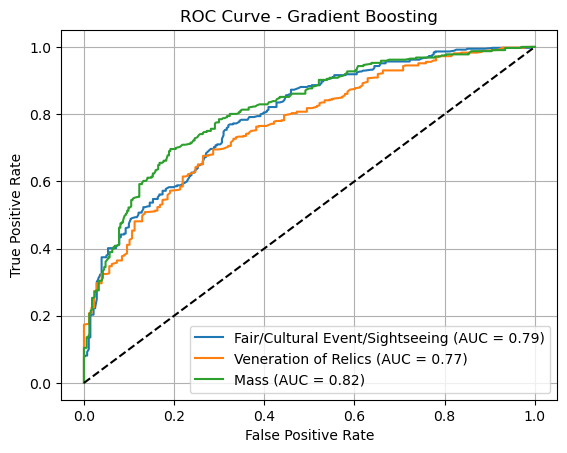

In [32]:

from sklearn.metrics import classification_report, accuracy_score, hamming_loss, jaccard_score, roc_auc_score, roc_curve, auc

from sklearn.multioutput import MultiOutputClassifier


# Function to plot ROC Curve for multi-label
def plot_multilabel_roc(y_test, y_score, title, class_names):
    n_classes = y_test.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test.iloc[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {title}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# List of models
models = {

    "Gradient Boosting": MultiOutputClassifier(GradientBoostingClassifier())
}

# Evaluate each model
for name, model in models.items():
    print(f"\n--- {name} Classifier ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Try-except for predict_proba
    try:
        y_score = model.predict_proba(X_test)
        y_score = np.array([prob[:, 1] for prob in y_score]).T
        supports_proba = True
    except AttributeError:
        y_score = y_pred
        supports_proba = False

    print(classification_report(y_test, y_pred, target_names=y.columns))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Hamming Loss:", hamming_loss(y_test, y_pred))
    print("Jaccard Score (macro):", jaccard_score(y_test, y_pred, average='macro'))

    if supports_proba:
        print("AUC-ROC Score (macro):", roc_auc_score(y_test, y_score, average='macro'))
        plot_multilabel_roc(y_test, y_score, name, y.columns)


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Example: 7 input features and 3 output labels
model = Sequential()
model.add(Dense(64, input_dim=7, activation='relu'))   # 1st hidden layer
model.add(Dense(32, activation='relu'))                # 2nd hidden layer
model.add(Dense(3, activation='sigmoid'))              # Output layer (3 events)

# Compile
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


ModuleNotFoundError: No module named 'tensorflow'

In [6]:
import tensorflow as tf
print(tf.__version__)


ModuleNotFoundError: No module named 'tensorflow'

In [46]:
import joblib
joblib.dump(model, 'gradient_boost_model.joblib')

print("Model saved successfully!")

Model saved successfully!


In [48]:
joblib.dump(le_state, 'encoders/le_state.joblib')
joblib.dump(le_stay, 'encoders/le_stay.joblib')
joblib.dump(le_visitcount, 'encoders/le_visitcount.joblib')
joblib.dump(le_age, 'encoders/le_age.joblib')
# Save the rest of your label encoders similarly

print("encoders saved successfully!")

encoders saved successfully!


In [35]:

import pickle

#Load the model (do this once, maybe at the start of your script)
with open("C:/Users/91749/OneDrive/Desktop/Dissertation/models/gradient_boost_model.pkl", "rb") as f:
    model = pickle.load(f)

# Then later in your predict_participation function:
prediction = model.predict(features)


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/91749/OneDrive/Desktop/Dissertation/models/gradient_boost_model.pkl'

In [49]:
# Step 4: Load the model from the saved file
loaded_model = joblib.load('gradient_boost_model.joblib')

# Predict with the loaded model (using the same test set as an example)
y_pred_loaded = loaded_model.predict(X_test)



In [50]:
import pandas as pd

# Example new input for a first-time visitor
new_data = pd.DataFrame([{

    'Age groups':4, 
    'Gender:':1, 
    'State/Country':1, 
    'Type of visitors':2, 
    'Are you camping at the Basilica?':1, 
    'Weekend':1, 
    'Is Feast Day':1
}])

# Predict event(s) the visitor is likely to attend
predicted_event = loaded_model.predict(new_data)

# If it's multioutput, this will return a 2D array (e.g., [[1, 0, 1]] for 3 events)
print("Predicted Event(s):", predicted_event)




Predicted Event(s): [[0 1 1]]


AttributeError: 'list' object has no attribute 'shape'

In [51]:
# Example: event label order used during training
event_labels = ['Fair/Cultural Event/Sightseeing', 'Veneration of Relics', 'Mass']

# Get predicted events (True = 1)
predicted_events_list = [event for event, val in zip(event_labels, predicted_event[0]) if val == 1]
print("Predicted Events:", predicted_events_list)

Predicted Events: ['Veneration of Relics', 'Mass']


In [39]:
# Decode the label-encoded categories to show original text values
valid_choices = {
    'Age groups': le_age.inverse_transform(sorted(df['Age groups'].unique())),
    'Gender:': le_gender.inverse_transform(sorted(df['Gender:'].unique())),
    'State/Country': le_state.inverse_transform(sorted(df['State/Country'].unique())),
    'Type of visitors': le_visitcount.inverse_transform(sorted(df['Type of visitors'].unique())),
    'Are you camping at the Basilica?': le_stay.inverse_transform(sorted(df['Are you camping at the Basilica?'].unique()))
}


In [40]:
def interactive_predict_event(model, le_gender, le_state, le_stay, le_age, le_visitcount, event_labels, valid_choices):
    print("\n Welcome to the Visitor Event Predictor!")
    print("Please enter values from the valid options shown below.\n")

    raw_input = {}

    for feature, options in valid_choices.items():
        print(f"{feature} options: {list(options)}")
        while True:
            user_input = input(f"Enter value for '{feature}': ")
            if user_input in options:
                raw_input[feature] = user_input
                break
            else:
                print("❌ Invalid input. Please enter exactly one of the shown options.")

    # Additional binary inputs
    raw_input['Weekend'] = input("Is it a Weekend? (Yes/No): ").strip().capitalize()
    raw_input['Is Feast Day'] = input("Is it Feast Day? (Yes/No): ").strip().capitalize()

    # Encode input
    try:
        encoded_input = {
            'Age groups': le_age.transform([raw_input['Age groups']])[0],
            'Gender:': le_gender.transform([raw_input['Gender:']])[0],
            'State/Country': le_state.transform([raw_input['State/Country']])[0],
            'Type of visitors': le_visitcount.transform([raw_input['Type of visitors']])[0],
            'Are you camping at the Basilica?': le_stay.transform([raw_input['Are you camping at the Basilica?']])[0],
            'Weekend': 1 if raw_input['Weekend'] == 'Yes' else 0,
            'Is Feast Day': 1 if raw_input['Is Feast Day'] == 'Yes' else 0
        }

        input_df = pd.DataFrame([encoded_input])
        y_pred = model.predict(input_df)
        predicted_events = [event_labels[i] for i, val in enumerate(y_pred[0]) if val == 1]

        print("\n✅ Prediction complete!\n")
        print("🎯 Predicted Events :")
        if predicted_events:
            for event in predicted_events:
                print("•", event)
        else:
            print("No specific event predicted.")
            
    except Exception as e:
        print("❌ Error during prediction:", str(e))


In [41]:
interactive_predict_event(loaded_model, le_gender, le_state, le_stay, le_age, le_visitcount, event_labels, valid_choices)



 Welcome to the Visitor Event Predictor!
Please enter values from the valid options shown below.

Age groups options: ['early professionals', 'mature adults', 'senior citizen', 'young adults', 'young dependents', 'youth']
Gender: options: ['Male', 'female']
❌ Invalid input. Please enter exactly one of the shown options.
State/Country options: ['andhra pradesh', 'arunachal pradesh', 'assam', 'australia', 'belarus', 'bihar', 'chhattisgarh', 'delhi', 'fiji', 'france', 'germany', 'goa', 'gujarat', 'haryana', 'himachal pradesh', 'ireland', 'jammu & kashmir', 'jharkhand', 'karnataka', 'kerala', 'khazakistan', 'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'nagaland', 'nepal', 'netherlands', 'odisha', 'philippines', 'poland', 'portugal', 'punjab', 'rajasthan', 'russia', 'singapore', 'spain', 'switzerland', 'tamil nadu', 'tanzania', 'telangana', 'uk', 'usa', 'uttar pradesh', 'uttarakhand', 'washington dc', 'west bengal', 'zimbabwe']
Type of visitors options: ['first time visitors', 

In [43]:
import sklearn
print(sklearn.__version__)

1.2.2
